In [120]:
import json
import captum
from captum.attr import visualization as viz
import os
import logging
import numpy as np
import json
import torch
from transformers import AutoTokenizer
from PIL import Image
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from  PIL import Image

In [4]:
!torchserve --start --ts-config config.properties

TorchServe is already running, please use torchserve --stop to stop TorchServe.


In [5]:
!curl -H "Content-Type: application/json" --data @input.json http://127.0.0.1:8080/v1/models/cifar10_test:predict


{
  "predictions": [
    {
      "8": 0.27697500586509705,
      "4": 0.18153661489486694,
      "1": 0.13990817964076996,
      "6": 0.12045431137084961,
      "7": 0.0980413556098938
    }
  ]
}

In [6]:
!curl -H "Content-Type: application/json" --data @input.json http://127.0.0.1:8080/v1/models/cifar10_test:explain


{
  "explanations": [
    [
      [
        [
          0.00013838141861251168,
          0.0012781123283560059,
          -4.567795566747506e-05,
          -0.0033040453544952767,
          0.00030122613067434166,
          0.00428411805003644,
          0.003487121956780566,
          -0.00278898656271898,
          -0.003406753390428904,
          -9.724575581400502e-05,
          0.0009303860723981591,
          0.0017162891113055652,
          0.001416914121120657,
          0.001402749254674163,
          0.0037313170489717386,
          -0.0010269761781763333,
          0.0006301275733262052,
          0.0004228275472991817,
          -0.0036161932468373025,
          -0.0021428112488865543,
          0.004297024016365996,
          0.0015401053824166187,
          0.002167337968597205,
          0.0004228956586209863,
          0.004623823687924795,
          0.004037131507281498,
          -0.0007292928276548717,
          0.008930397934408668,
          0.0073056714495855265,

          -0.00013753083336080337,
          -1.2853001049752042e-05,
          -4.670490843834388e-05,
          -0.0011394945915160532,
          0.0031510324107247105,
          0.0006436222916260493,
          0.000525929438702127,
          -0.0009049861087629134,
          -0.0017472077420142367,
          -0.004247755878769087,
          -0.002260578836859125,
          -0.0003322379237907716,
          0.0019184285985918614,
          -0.00046251575148514417,
          0.002652948654578063,
          0.00036033936347888744,
          0.00033112421406034955,
          0.0014324340166544335,
          0.0009211582719255156,
          0.0025249641825630153,
          -0.0004050928962580475,
          0.0032279822240633255,
          0.0019346011833380088,
          -0.00033645537615322667,
          -8.777348259142011e-05,
          -0.000733774491959573,
          5.74748612603717e-05,
          -1.1175911478844807e-05,
          3.0064991169940755e-05,
          0.00016268650133

          -0.00039752152396677347,
          0.002883447138042708,
          0.000628943253835341,
          -0.0009451990166961665,
          0.00040848856519507925,
          0.0005974882805501911,
          -0.00010797580266246073,
          0.0001356896786502437,
          -0.0002583644956457198
        ],
        [
          -0.005869316514569501,
          0.00192786302688496,
          -0.0024923619407655924,
          -0.008862352224148697,
          -0.008132635259971899,
          -0.00934181797944775,
          -0.0056410150387911796,
          -0.00573941674009433,
          0.001743037886194069,
          -0.0012396159739388338,
          -0.006059636734842554,
          -0.007641548934744152,
          0.00230332392686715,
          0.000911338762627275,
          0.020330574778383608,
          0.027211718283826965,
          -0.00801795286109991,
          -0.01163088667745118,
          0.0030590837892441763,
          0.0015921998832780357,
          -0.00591371759205

          0.0013474774512050045,
          0.000547138825820742,
          -0.0016199478572543548,
          -0.004206461389594188,
          0.0019306090380361604,
          -0.0016811982917690595,
          -5.877451197355795e-05,
          -0.0016219737668292657,
          0.00044806071202779216,
          -7.586238399526946e-05,
          -0.0019328905428114757,
          -0.0010382751717109143,
          -0.000879143654864171,
          3.4574729717153244e-05,
          -0.00037281004220028645,
          -0.00047699706896909785,
          -0.00014951049131884428,
          0.0002742124088413101,
          -0.0013145099680210595,
          -0.00029945390772083,
          0.0006265428527515948,
          -0.0004145204202279494,
          8.47253576851952e-06,
          -8.003581773645646e-05,
          -0.00046998623380385067,
          0.0012331088557825368,
          0.0003815565577658553,
          -0.0013723690703424144,
          0.0016195630876219315,
          -0.001826104981

          3.5589110392171364e-05,
          -0.0019705111392904705,
          -0.0017999389693224169,
          -0.001069740549724793,
          -0.001407739018044277,
          0.00020279806579726048,
          1.5148355286378728e-05,
          -2.9139191614017205e-05,
          0.0004245667085363884,
          0.0027724820489931157,
          0.0007143281296915186,
          0.00016970324567014392,
          -0.0006352560071986698,
          -3.250384263402292e-05,
          -0.0005965765175474507,
          0.0003789583086892934,
          -0.00015125566340318922,
          -3.8406742622519e-05,
          -0.0008140295234890194,
          -0.00047449193553254646,
          8.739652443268039e-05,
          -3.376276675083181e-05,
          -4.016120706090153e-05,
          -0.00027826329728240085,
          0.00014988118972579205,
          -0.001237203747669778,
          0.00017110230195870857,
          0.0015584360712432694,
          0.0021979744435438736,
          0.0012296368

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
!curl -H "Content-Type: application/json" --data @input.json http://127.0.0.1:8080/v1/models/cifar10_test:explain > output_cifar10_explain.json


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5068k  100 4924k  100  144k  1620k  48708  0:00:03  0:00:03 --:--:-- 1668k


In [9]:
explainations_file=open('./output_cifar10_explain.json', 'r')
explainations_json = json.load(explainations_file)
attributions = explainations_json['explanations']


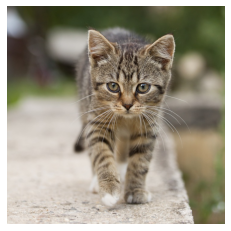

In [123]:
img = Image.open("./test.png")
plt.imshow(img); plt.axis('off'); plt.show()


In [102]:
transform = transforms.Compose([
 transforms.Resize(224),
 transforms.CenterCrop(224),
 transforms.ToTensor()
])

transform_normalize = transforms.Normalize(
     mean=[0.485, 0.456, 0.406],
     std=[0.229, 0.224, 0.225]
 )


In [103]:
transformed_img = transform(img)

In [109]:
input = transform_normalize(transformed_img)
# input = input.unsqueeze(0)

In [110]:
attributions = np.array(attributions)
inp_image = np.array(input)

In [112]:
inp_image = inp_image.reshape((224,224,3))
attributions = attributions.reshape((224,224,3))

In [113]:
#Printing the shape of attributions and inp_image
print("Attributions Shape :", attributions.shape)
print("Input Image Shape :", inp_image.shape)


Attributions Shape : (224, 224, 3)
Input Image Shape : (224, 224, 3)


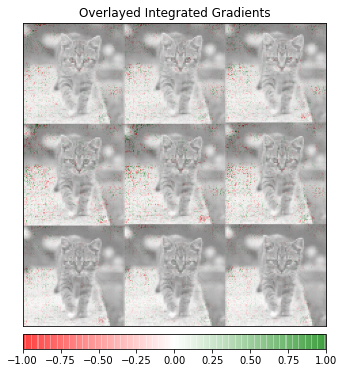

(<Figure size 432x432 with 2 Axes>,
 <AxesSubplot:title={'center':'Overlayed Integrated Gradients'}>)

In [114]:
viz.visualize_image_attr(attributions,
                             inp_image,method="blended_heat_map",sign="all",
                          show_colorbar=True, title="Overlayed Integrated Gradients")